<a href="https://colab.research.google.com/github/msbeigiai/tensorflow-dnn/blob/main/Car_Price_Prediction_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting car price

In this notebook we want to predict car price according given dataset. 
This dataset has imported from [Kaggle](https://www.kaggle.com/hellbuoy/car-price-prediction). 

_**By the end of this session we will be able to predict new given car price according to given features or spesifications.**_

First we import neccessary libraries. According to given dataset which is **Linear Regression** problem, I'd prefer do this peoject with **Deep Neural Network** (DNN). 
So, to begin, we implement neccassary libraries.

_This project has done in **Google Colab**._

## Importing necessary library

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.7.0


As can be seen in this project I will use the latest version of **Tensorflow** inside google colab.

So, the next step is to bring dataset into the world of notebook. To do that we use `pandas` and `.read_csv` function. 

## Importing dataset:

In [6]:
car_price = pd.read_csv("CarPrice_Assignment.csv")
car_price

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


As we can see there are `205*26` table which means `205` number of examples we have train our model and `26` features which are important and effect in data training. 

So, now that we see the data and have snapshot, it's time to do some clarification on data. The fisrt thing that can be considrable is `car_ID` column. We are going to drop this column because it will not effective nor necessary. 

`pandas` will brings us column number for us. To do that we will use `.drop` function from `pandas` and implement `car_ID` column.

In [7]:
car_price = car_price.drop(["car_ID"], axis=1)
car_price

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Now, another looking at our dataset, shows us `CarName` column again is not necessary, because we can handle data training without that.


In [8]:
car_price = car_price.drop(["CarName"], axis=1)

Now, our dataset has `24` columns.

In [9]:
car_price.loc[0].shape

(24,)

In [10]:
car_price.loc[0]

symboling                     3
fueltype                    gas
aspiration                  std
doornumber                  two
carbody             convertible
drivewheel                  rwd
enginelocation            front
wheelbase                  88.6
carlength                 168.8
carwidth                   64.1
carheight                  48.8
curbweight                 2548
enginetype                 dohc
cylindernumber             four
enginesize                  130
fuelsystem                 mpfi
boreratio                  3.47
stroke                     2.68
compressionratio              9
horsepower                  111
peakrpm                    5000
citympg                      21
highwaympg                   27
price                     13495
Name: 0, dtype: object

To start working our data and make machaine learning model we need some preprocessing. By evaluating our data it shows that we need **feature scaling** and **encoding** some data. 

We need feature scaling because we see some values are not in same range and we need encoding to omit _object_ data types and _categorized_ data.

To do that we need some implementions of `scikitlearn` library:

## Preprocessing data:

In [11]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [12]:
ct = make_column_transformer((MinMaxScaler(),
                              ["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize",
                               "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm",
                               "citympg", "highwaympg"]),
                             (OneHotEncoder(handle_unknown='ignore'),
                              ["fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation",
                               "enginetype", "cylindernumber", "fuelsystem"]))
X = car_price.drop("price", axis=1)
y = car_price["price"]

Now, it's time to split data to `train` and `test` data. Again, `scikitlearn` will help us:

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Next, we should fit our training data to our transformed date by using `fit` function:

In [14]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['wheelbase', 'carlength', 'carwidth',
                                  'carheight', 'curbweight', 'enginesize',
                                  'boreratio', 'stroke', 'compressionratio',
                                  'horsepower', 'peakrpm', 'citympg',
                                  'highwaympg']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['fueltype', 'aspiration', 'doornumber',
                                  'carbody', 'drivewheel', 'enginelocation',
                                  'enginetype', 'cylindernumber',
                                  'fuelsystem'])])

We fit transformed data only for trained data because there is no need to fit that to test data. Because our test data is ongoing data and feauture data don't need to be transformed. 

New variable is created and are ready to feed to the model: 

In [15]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [16]:
X_train.loc[0]

symboling                     3
fueltype                    gas
aspiration                  std
doornumber                  two
carbody             convertible
drivewheel                  rwd
enginelocation            front
wheelbase                  88.6
carlength                 168.8
carwidth                   64.1
carheight                  48.8
curbweight                 2548
enginetype                 dohc
cylindernumber             four
enginesize                  130
fuelsystem                 mpfi
boreratio                  3.47
stroke                     2.68
compressionratio              9
horsepower                  111
peakrpm                    5000
citympg                      21
highwaympg                   27
Name: 0, dtype: object

In [17]:
X_train_normal[0].shape

(50,)

## Implementing model:

As can be seen our dataset has `50` columns which show that we could transform our data to be trainable.

And nowl, we make a variable `model` and make our `DNN` for **Linear Regression**:

In [18]:
tf.random.set_seed(42)

We will begine our model creation with two layers. One hidden layer with 10 units and second and output one, with single output layer:

In [19]:
model = tf.keras.Sequential([tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)])
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
history = model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 2ms/step - loss: 13222.9463 - mae: 13222.9463
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 13221.8232 - mae: 13221.8232
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 13220.5273 - mae: 13220.5273
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 13218.8887 - mae: 13218.8887
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 13216.7344 - mae: 13216.7344
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 13213.7910 - mae: 13213.7910
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 13209.7100 - mae: 13209.7100
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 13204.0244 - mae: 13204.0244
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 13196.0762 - mae: 13196.0762
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 13184.7959 - mae: 13184.7959

### Evaluating the model:

We can evaluate our model by plotting `loss function` and see if it is minimizing or not. 

Because we use `mean absolute error` principles to reduce `error` we can see it's effects to model precision analysis:

Text(0, 0.5, 'loss')

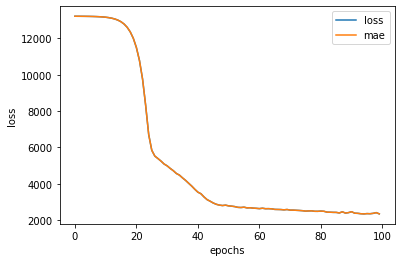

In [20]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

By calling `evaluate` function we can see our `mae` to evaluate `error`:

In [21]:
model.evaluate(X_test_normal, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 2779.8079 - mae: 2779.8079


[2779.807861328125, 2779.807861328125]

And to see the model precision we can make a value and feed test data as argument and call `predict` model:

In [22]:
y_pred = model.predict(X_test_normal)

Here we can plot our result by calling a column instance, for example `peakrpm`:

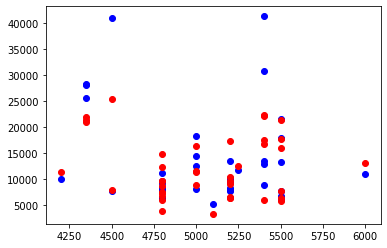

In [23]:
plt.scatter(X_test['peakrpm'], y_test, c='b')
plt.scatter(X_test['peakrpm'], y_pred, c='r')

👆 Red dots show our predicted data and the blue ones are our test data.



### Experimenting the model:

👇 As we know **machine learning** is visualizing and experiment. Now, we are going to some experiment and see can we reduce `mae` and get more precise result. We will use two hidden layers and their units and use `adam` optimizer instead of `stochastic gradient descent`. finally, we will increase `epochs`:

In [24]:
tf.random.set_seed(42)

In [25]:
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(40),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])
model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])
history_2 = model_2.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 13217.9072 - mae: 13217.9072
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 13195.9492 - mae: 13195.9492
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 13149.2148 - mae: 13149.2148
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 13061.1328 - mae: 13061.1328
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 12910.1680 - mae: 12910.1680
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 12669.7686 - mae: 12669.7686
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 12305.8496 - mae: 12305.8496
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 11783.1367 - mae: 11783.1367
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 11052.6582 - mae: 11052.6582
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 10067.3711 - mae: 10067.3711

Again plotting `loss function` to make sure there is minimization:

Text(0, 0.5, 'loss')

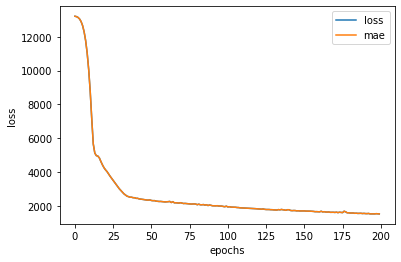

In [26]:
pd.DataFrame(history_2.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

evaluating the model by implementing `evaluate` method to analyze the new model:

In [27]:
model_2.evaluate(X_test_normal, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 2167.1648 - mae: 2167.1648


[2167.164794921875, 2167.164794921875]

👆 At this time we could reach more less `mae` which means our model would be more effective:

In [28]:
y_pred_2 = model_2.predict(X_test_normal)

And now by plotting two instant columns to see model precision:

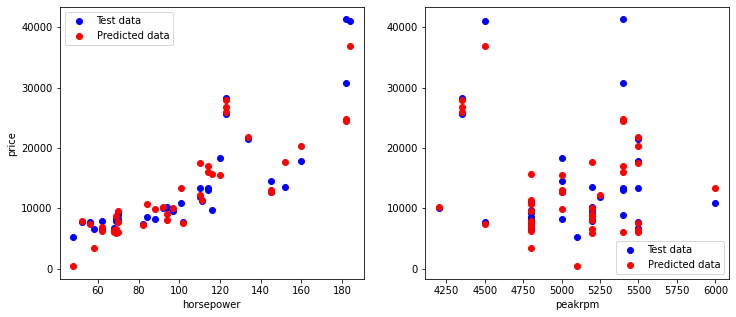

In [33]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
axes[0].scatter(X_test['horsepower'], y_test, c='b')
axes[0].scatter(X_test['horsepower'], y_pred_2, c='r')
axes[0].set(xlabel="horsepower")
axes[0].set(ylabel="price")
axes[0].legend(["Test data", "Predicted data"])

axes[1].scatter(X_test['peakrpm'], y_test, c='b')
axes[1].scatter(X_test['peakrpm'], y_pred_2, c='r')
axes[1].set(xlabel="peakrpm")
axes[1].legend(["Test data", "Predicted data"])

🔑 **Note:** for experiment we should always consider about _overfitting_ and _underfitting_ (bias and varians).